**Arman Arkilic**

Quant Methods in Finance

HW Set #2

_**PROBLEM 1: Symmetric Random Walk**_                                         


In [1]:
from __future__ import (absolute_import, division, unicode_literals, print_function)
import numpy as np
import numpy.random as rand
from matplotlib import pyplot as plt
import math
%matplotlib inline

Symmetric Random walk implementation: $X_0 = 0$ The random number generator is used to generate step_count=1e4 random values from a uniform distribution. Since symmetric, I check whether the generated random variable in each step is > 0.5. If so, I select the walk path to be in upwards direction compared to an earlier step, adding 1. Otherwise, I subtract 1.

In [2]:
def walk(step_count):
    """Returns the result for one of the possible paths
    """
    walk_path = np.zeros(step_count)
    # Draw samples from a uniform distribution.
    uniform_arr = rand.uniform(size=step_count)
    # X_0 = 0
    uniform_arr[0] = 0
    for index, x in np.ndenumerate(uniform_arr):
        if x < 0.5: # since symmetric 0.5
            walk_path[index[0]] = walk_path[index[0]-1] + 1
        else:
            walk_path[index[0]] = walk_path[index[0]-1] - 1
    return walk_path

Run the program for N = 10000 and plot the outcome

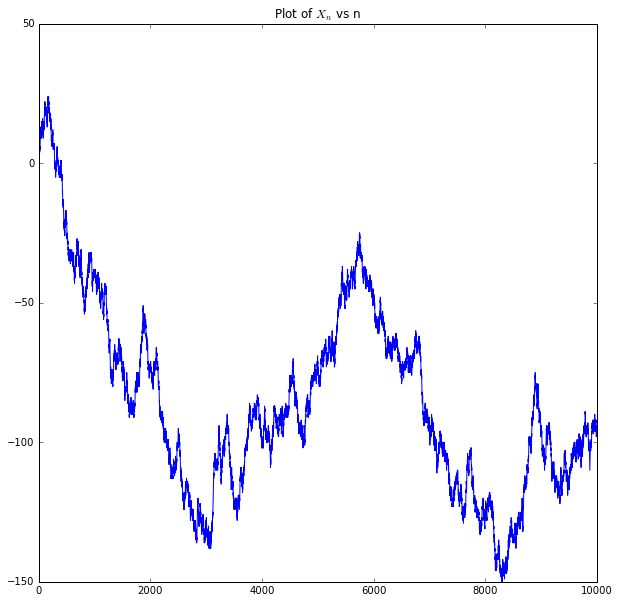

In [3]:
res = walk(int(1e4))
fig=plt.figure()
fig.set_size_inches([10,10])
plt.plot(res)
plt.title('Plot of $X_n$ vs n')
plt.show()

In [4]:
def calculate_wn(m_walk):
    w = []
    for index, value in enumerate(m_walk):
        w.append(math.sqrt(index) * value)
    return w

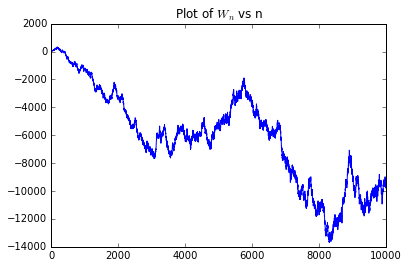

In [5]:
plt.plot(calculate_wn(res))
plt.title('Plot of $W_n$ vs n')

I understand that above code obtains the outcome for one of the paths out of $2^{n}$ potential paths. I added the simple code to calculate the outcome for all potential paths in case I would need this in the future.

In [6]:
def make_walk(step_count, path_count):
    """Run the walk for given number of potential paths"""
    outcomes = []
    for _ in range(path_count):
        outcomes.append(walk(step_count))
    yield outcomes

Sample Output for 10 distinct paths. They all distinctly end at different points that shows the clear existence of distinct paths in practice

In [7]:
next(make_walk(step_count=10000, path_count=10))

[array([  1.,   2.,   1., ..., -50., -49., -50.]),
 array([   1.,    2.,    3., ..., -168., -169., -168.]),
 array([  1.,   0.,  -1., ..., -20., -19., -20.]),
 array([   1.,    2.,    1., ...,  150.,  149.,  150.]),
 array([  1.,   0.,  -1., ...,  80.,  81.,  80.]),
 array([  1.,   2.,   3., ..., -44., -43., -44.]),
 array([   1.,    2.,    3., ..., -190., -189., -190.]),
 array([  1.,   2.,   3., ...,  92.,  93.,  94.]),
 array([  1.,   0.,   1., ...,  14.,  15.,  16.]),
 array([   1.,    2.,    1., ..., -108., -107., -106.])]

$a^2 \sum_{x=0}^{\inf}\mu(x)$